<h1>Sub-Metric: City Recreational Facilities</h1>
<h3>Madelyn Dayrit</h3>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    412 non-null    int64  
 1   id                     412 non-null    int64  
 2   parcel_id              402 non-null    object 
 3   inactive               401 non-null    object 
 4   name                   412 non-null    object 
 5   rentable               412 non-null    object 
 6   type                   412 non-null    object 
 7   primary_user           412 non-null    object 
 8   address_number         257 non-null    float64
 9   street                 398 non-null    object 
 10  zip                    230 non-null    float64
 11  image                  394 non-null    object 
 12  neighborhood           411 non-null    object 
 13  council_district       412 non-null    int64  
 14  ward                   411 non-null    float64
 15  tract 

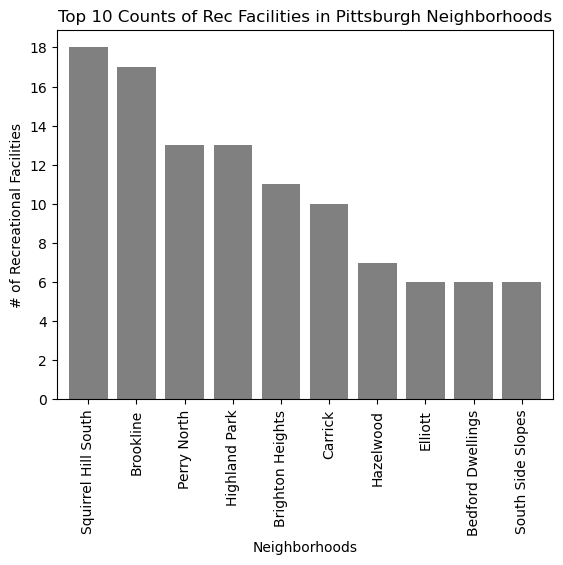

In [95]:
# database contains restrooms, shelters, rec centers, pools, concessions, shelter, pool/rec, dugouts, activity, senior, community
# -- also contains offices, firehouses, storage, utility, service, medic stations, training, police, recycling, SERVICE
# STORAGE, POLICE, OFFICE, 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# read and load file into biggy
biggy = pd.read_csv(r"C:\Users\MED255\Downloads\cityfacilities.csv")

# print information
biggy.info()

#display unique types of places and amount of unique types
print(str(len(biggy["type"].unique())))
print(biggy["type"].unique())

# display unique neighborhoods and amount of neighborhohods
print(str(len(biggy['neighborhood'].unique())))
print(biggy['neighborhood'].unique())

# test print 10 random rows from biggy
biggy.sample(10)

# group by neighborhood
ngrouped = biggy.groupby('neighborhood').count()
ngrouped.head(30)

# use query masks to count number of recreation related facilities per neighborhood
qm_rec = biggy['type'].str.contains('Rec Center', regex = False)
qm_poolrec = biggy['type'].str.contains('Pool/Rec', regex = False)
#qm_restroom = biggy['type'].str.contains('Restrooms', regex = False)
qm_activity = biggy['type'].str.contains('Activity', regex = False)
qm_pool = biggy['type'].str.contains('Pool', regex = False)
qm_shelter = biggy['type'].str.contains('Shelter', regex = False)
qm_dugout = biggy['type'].str.contains('Dugout', regex = False)
qm_community = biggy['type'].str.contains('Community', regex = False)
qm_concession = biggy['type'].str.contains('Concession', regex = False)
qm_cabin = biggy['type'].str.contains('Cabin', regex = False)
qm_poolclosed = biggy['type'].str.contains('Pool Closed', regex = False)
qm_active = biggy['inactive'].str.contains('f', regex = False)


# create dataframe of active rec-related facilities
rec_related_df = biggy[qm_active & (qm_rec|qm_poolrec|qm_activity|qm_pool|qm_shelter|qm_dugout|qm_community|qm_cabin|qm_poolclosed|qm_concession)]

# save rec related dataframe as csv to view
rec_related_df.to_csv("rec_related_df_.csv", index=False)

# count rec facilities by neighborhood
neighborhood_counts = rec_related_df['neighborhood'].value_counts()

# isolate top 10 neighborhoods with highest counts
top_10 = neighborhood_counts.nlargest(10)

# plot a barplot
top_10.plot(kind = 'bar', color = 'grey', width = 0.8)

# format plot
plt.xlabel('Neighborhoods')
plt.ylabel('# of Recreational Facilities')
plt.title('Top 10 Counts of Rec Facilities in Pittsburgh Neighborhoods')

y_axis_steps = np.arange(0, top_10.max() + 2, step = 2)
plt.yticks(y_axis_steps)
plt.xticks(fontsize = 10)

# display plot
plt.show()


# Top 4 Neighborhoods
1. **Squirrel Hill South**
2. **Brookline**
3. **Perry North** 
4. **Highland Park**


type
Shelter       12
Activity       2
Cabin          2
Concession     1
Pool           1
Name: count, dtype: int64


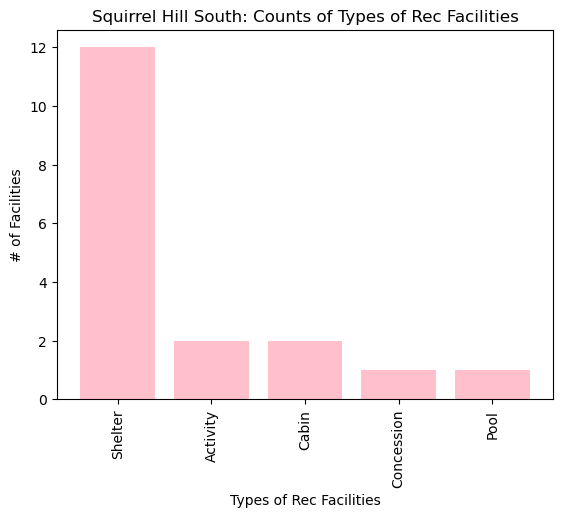

In [91]:
# now lets look at the distribution of different types of rec facilities in the top 4 neighborhoods

# first is Squirrel Hill South

# isolate Squirrel Hill South rec-facility data using query mask
qm_shs = rec_related_df['neighborhood'].str.contains("Squirrel Hill South", regex = False)
shs_df = rec_related_df[qm_shs]

# count each type of facility
shs_type_counts = shs_df['type'].value_counts()

# display counts of each type
print(shs_type_counts.head(10))

# plot different types
shs_type_counts.plot(kind = 'bar', color = 'pink', width = 0.8)
plt.xlabel('Types of Rec Facilities')
plt.ylabel('# of Facilities')
plt.title('Squirrel Hill South: Counts of Types of Rec Facilities')

# display plot
plt.show()


type
Dugout        7
Concession    3
Shelter       3
Pool          2
Rec Center    1
Pool/Rec      1
Name: count, dtype: int64


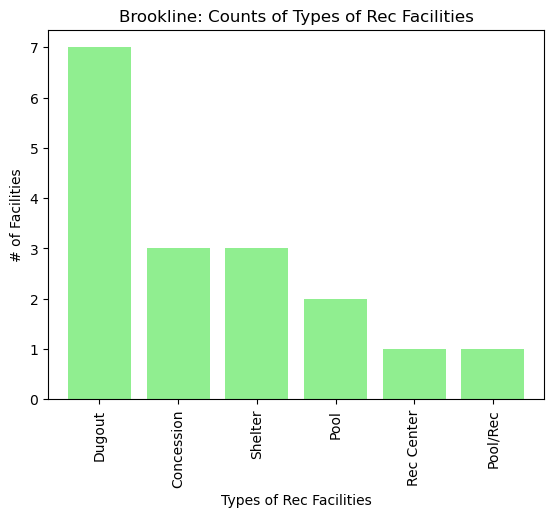

In [92]:
# second is Brookline

# isolate Brookline rec-facility data using query mask
qm_bkl = rec_related_df['neighborhood'].str.contains("Brookline", regex = False)
bkl_df = rec_related_df[qm_bkl]

# count each type of facility
bkl_type_counts = bkl_df['type'].value_counts()

# display counts of each type
print(bkl_type_counts.head(10))

# plot different types
bkl_type_counts.plot(kind = 'bar', color = 'lightgreen', width = 0.8)
plt.xlabel('Types of Rec Facilities')
plt.ylabel('# of Facilities')
plt.title('Brookline: Counts of Types of Rec Facilities')

# display plot
plt.show()

type
Shelter       8
Dugout        2
Concession    1
Pool          1
Cabin         1
Name: count, dtype: int64


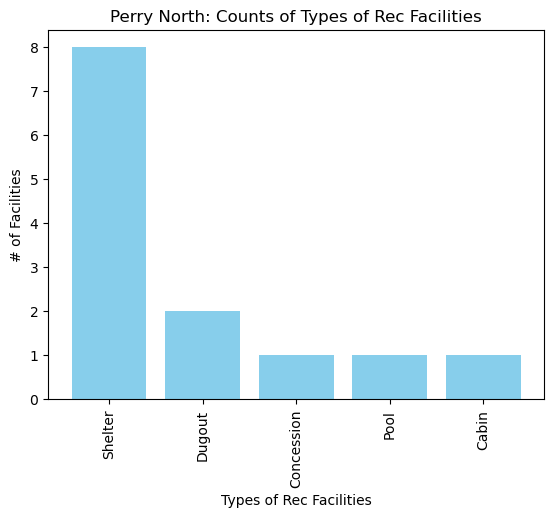

In [93]:
# third is Perry North

# isolate Perry North rec-facility data using query mask
qm_pyn = rec_related_df['neighborhood'].str.contains("Perry North", regex = False)
pyn_df = rec_related_df[qm_pyn]

# count each type of facility
pyn_type_counts = pyn_df['type'].value_counts()

# display counts of each type
print(pyn_type_counts.head(10))

# plot different types
pyn_type_counts.plot(kind = 'bar', color = 'skyblue', width = 0.8)
plt.xlabel('Types of Rec Facilities')
plt.ylabel('# of Facilities')
plt.title('Perry North: Counts of Types of Rec Facilities')

# display plot
plt.show()

type
Shelter     10
Activity     1
Cabin        1
Pool         1
Name: count, dtype: int64


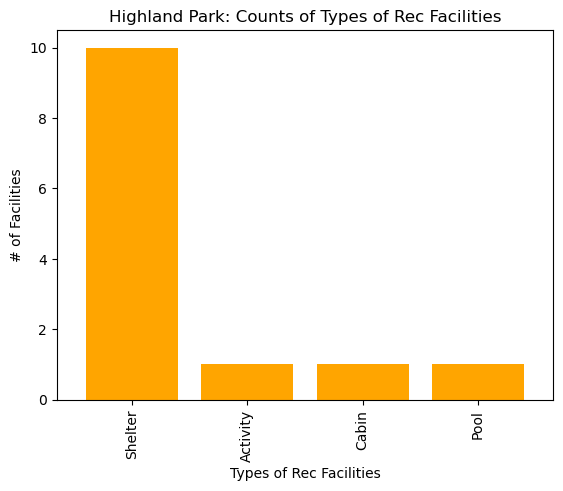

In [94]:
# fourth is Highland Park

# isolate Highland Park rec-facility data using query mask
qm_hpk = rec_related_df['neighborhood'].str.contains("Highland Park", regex = False)
hpk_df = rec_related_df[qm_hpk]

# count each type of facility
hpk_type_counts = hpk_df['type'].value_counts()

# display counts of each type
print(hpk_type_counts.head(10))

# plot different types
hpk_type_counts.plot(kind = 'bar', color = 'orange', width = 0.8)
plt.xlabel('Types of Rec Facilities')
plt.ylabel('# of Facilities')
plt.title('Highland Park: Counts of Types of Rec Facilities')

# display plot
plt.show()

<h1>Conclusion</h1>